# Astro - statistic and cosmology 
## Giacomo Menegatti - 2122852
## Exercise 1: Coin tosses inference
The toin coss is a Bernoulli process with a probaility $p_h$ of giving _head_. The likelihood is given by $L(\bar{x}|p_h)=\Pi_{i=1}^Np(x_i)$ with $x_i$ the outcome, with $p(x=H)=p_h$ and $p(x=T)=1-p_h$, so $L(N_H,N_T|p_h)=p_h^{N_h}(1-p_h)^{N_T}$.

In [32]:
import numpy as np
import matplotlib.pyplot as plt
from scipy import integrate
from scipy.stats import bernoulli
np.random.seed(213) #Setting the seed to have consistent results

In [33]:
p_h = 0.3 
x = bernoulli.rvs(p_h, size=1000)

N_h = np.sum(x)
print("Simulating 1000 coin tosses.")
print(f'Obtained {np.sum(x)} heads ({np.sum(x)/10} %) and {1000-np.sum(x)} tails ({100-np.sum(x)/10} %).')

Simulating 1000 coin tosses.
Obtained 297 heads (29.7 %) and 703 tails (70.3 %).


In [50]:
def likelihood(data):
    N_h = np.sum(data)
    N_t = len(data)-N_h
    return lambda p: p**N_h*(1-p)**N_t 

In [51]:
def posterior(likelihood, prior):
    post = lambda x: likelihood(x)*prior(x)
    area = integrate.quad(func=post, a=0.0, b=1.0, epsabs=1e-12, epsrel=1e-12)[0]
    print(area)

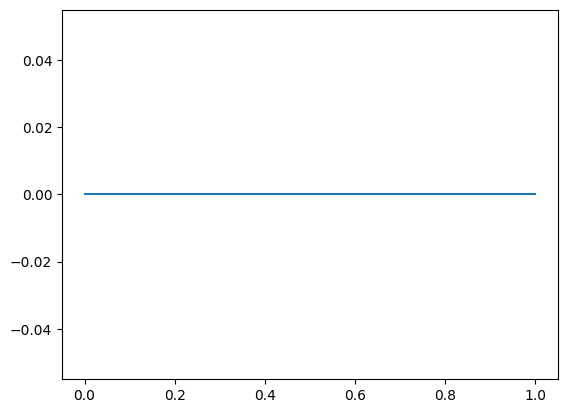

In [55]:
p = np.linspace(0,1,1000)
plt.plot(p, likelihood(x[0:1000])(p))